In [22]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [23]:
mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
classifier_model = mobilenet_v2
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE+(3,))
])

In [24]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [25]:
%cd /content/drive/MyDrive/Colab Notebooks/CV

/content/drive/MyDrive/Colab Notebooks/CV


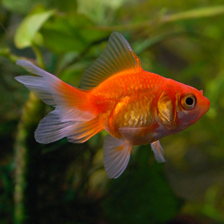

In [26]:
gold_fish = Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [27]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [28]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [29]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 0s 463ms/step


(1, 1001)

In [30]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [31]:
with open("ImageNetLabels.txt", "r") as f:
  image_labels = f.read().splitlines()
image_labels[predicted_label_index]

'goldfish'

In [32]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
data_dir

'./datasets/flower_photos'

In [33]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [34]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/8915661673_9a1cdc3755_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4510350093_3700064215.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8740218495_23858355d8_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2608937632_cfd93bc7cd.jpg'),
 PosixPath('datasets/flower_photos/dandelion/3539077354_c67aa7168d_m.jpg')]

In [35]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [36]:
roses = list(data_dir.glob('roses/*'))

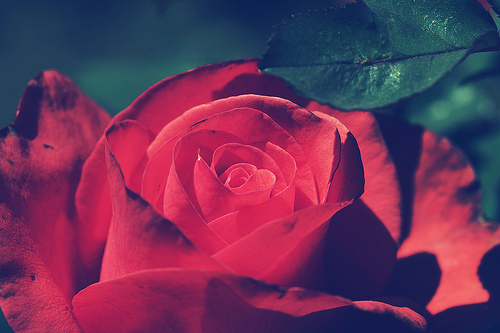

In [37]:
Image.open(roses[3])

In [38]:
tulips = list(data_dir.glob('tulips/*'))

In [39]:
flower_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
}

flower_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4,
}

In [40]:
img = cv2.imread(str(flower_images_dict['roses'][0]))
img.shape

(322, 500, 3)

In [41]:
cv2.resize(img, IMAGE_SHAPE).shape

(224, 224, 3)

In [42]:
x, y = [], []

for flower_name, images in flower_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, IMAGE_SHAPE)
    x.append(resized_img)
    y.append(flower_labels_dict[flower_name])

KeyboardInterrupt: 

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
predicted = classifier.predict(np.array([x[0], x[1], x[2]]))
print(predicted)
predicted = np.argmax(predicted, axis = 1)
predicted

In [ ]:
image_labels[795]

In [ ]:
feature_extracted_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_ = hub.KerasLayer(
    feature_extracted_model, input_shape = IMAGE_SHAPE+(3,), trainable = False
)

In [ ]:
num_of_flowers = 5
model = tf.keras.Sequential([
    pretrained_model_,
    tf.keras.layers.Dense(num_of_flowers)
])
model.summary()

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)
model.fit(x_train, y_train, epochs = 5)